### Tutorial 5- Kaggle Advance House Price Prediction Using Pytorch- Tabular Dataset

https://docs.fast.ai/tabular.html
https://www.fast.ai/2018/04/29/categorical-embeddings/
https://www.fast.ai/2018/04/29/categorical-embeddings/
https://yashuseth.blog/2018/07/22/pytorch-neural-network-for-tabular-data-with-categorical-embeddings/


1. Category Embedding


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [3]:
df.shape

(1201, 10)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [7]:
import datetime
datetime.datetime.now().year

2024

In [8]:
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']

In [9]:
df.drop("YearBuilt",axis=1,inplace=True)

In [10]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [11]:
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"

In [12]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [13]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [15]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,25
1456,0,3,85.0,13175,1,3,2073,0,210000,46
1457,6,3,66.0,9042,1,3,1188,1152,266500,83
1458,0,3,68.0,9717,1,3,1078,0,142125,74


In [16]:
### Stacking and Converting Into Tensors
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features
                       

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [17]:
### Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [18]:
#### create continuous variable
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)


In [19]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [20]:
### Stacking continuous variable to a tensor
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [21]:
cont_values.dtype

torch.float32

In [22]:
### Dependent Feature 
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int32  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int32  
 5   LotShape     1201 non-null   int32  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


In [24]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [25]:
len(df['MSSubClass'].unique())

15

In [26]:
#### Embedding Size For Categorical columns
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [27]:
cat_dims

[15, 5, 2, 4]

In [28]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [29]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [31]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [32]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [33]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [34]:
embedding_val

[tensor([[ 0.6132,  1.7302,  0.4036,  ..., -1.1219,  0.0567, -1.1538],
         [-0.0446,  1.1446, -2.1729,  ..., -0.7917, -0.4643,  1.0354],
         [ 0.6132,  1.7302,  0.4036,  ..., -1.1219,  0.0567, -1.1538],
         ...,
         [-0.1528, -0.3956, -0.4823,  ..., -0.0254,  0.4072,  1.1880],
         [-0.0446,  1.1446, -2.1729,  ..., -0.7917, -0.4643,  1.0354],
         [-0.0446,  1.1446, -2.1729,  ..., -0.7917, -0.4643,  1.0354]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-0.8677, -0.7878,  1.2586],
         [-0.8677, -0.7878,  1.2586],
         [-0.8677, -0.7878,  1.2586],
         ...,
         [-0.8677, -0.7878,  1.2586],
         [-0.8677, -0.7878,  1.2586],
         [-0.8677, -0.7878,  1.2586]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.0819],
         [0.0819],
         [0.0819],
         ...,
         [0.0819],
         [0.0819],
         [0.0819]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.7776, -1.0542],
         [ 0.7776, -1.0542],
         [-0.2738,  1.3415],

In [35]:
z = torch.cat(embedding_val, 1)
z

tensor([[ 0.6132,  1.7302,  0.4036,  ...,  0.0819,  0.7776, -1.0542],
        [-0.0446,  1.1446, -2.1729,  ...,  0.0819,  0.7776, -1.0542],
        [ 0.6132,  1.7302,  0.4036,  ...,  0.0819, -0.2738,  1.3415],
        ...,
        [-0.1528, -0.3956, -0.4823,  ...,  0.0819,  0.7776, -1.0542],
        [-0.0446,  1.1446, -2.1729,  ...,  0.0819,  0.7776, -1.0542],
        [-0.0446,  1.1446, -2.1729,  ...,  0.0819,  0.7776, -1.0542]],
       grad_fn=<CatBackward0>)

In [36]:
#### Implement dropupout
droput=nn.Dropout(.4)


In [37]:
final_embed=droput(z)
final_embed


tensor([[ 0.0000,  0.0000,  0.6727,  ...,  0.1365,  1.2959, -1.7570],
        [-0.0000,  1.9076, -3.6216,  ...,  0.1365,  0.0000, -1.7570],
        [ 0.0000,  2.8836,  0.6727,  ...,  0.1365, -0.4564,  2.2358],
        ...,
        [-0.2547, -0.0000, -0.8038,  ...,  0.0000,  1.2959, -0.0000],
        [-0.0000,  0.0000, -3.6216,  ...,  0.0000,  1.2959, -1.7570],
        [-0.0743,  0.0000, -3.6216,  ...,  0.1365,  1.2959, -1.7570]],
       grad_fn=<MulBackward0>)

In [38]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [39]:
len(cont_features)

5

In [40]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [41]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

#### Define Loss And Optimizer

In [42]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [43]:
df.shape

(1201, 10)

In [44]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [45]:
cont_values.shape

torch.Size([1201, 5])

In [46]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [47]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [48]:

epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.75
Epoch number: 11 and the loss : 200493.46875
Epoch number: 21 and the loss : 200489.140625
Epoch number: 31 and the loss : 200482.640625
Epoch number: 41 and the loss : 200473.25
Epoch number: 51 and the loss : 200461.375
Epoch number: 61 and the loss : 200446.40625
Epoch number: 71 and the loss : 200429.359375
Epoch number: 81 and the loss : 200408.0
Epoch number: 91 and the loss : 200383.421875
Epoch number: 101 and the loss : 200355.3125
Epoch number: 111 and the loss : 200322.125
Epoch number: 121 and the loss : 200291.4375
Epoch number: 131 and the loss : 200252.015625
Epoch number: 141 and the loss : 200206.609375
Epoch number: 151 and the loss : 200162.25
Epoch number: 161 and the loss : 200112.25
Epoch number: 171 and the loss : 200059.703125
Epoch number: 181 and the loss : 200005.71875
Epoch number: 191 and the loss : 199946.34375
Epoch number: 201 and the loss : 199881.578125
Epoch number: 211 and the loss : 199816.328125
Epoch number

In [49]:
# https://stackoverflow.com/questions/55466298/pytorch-cant-call-numpy-on-variable-that-requires-grad-use-var-detach-num

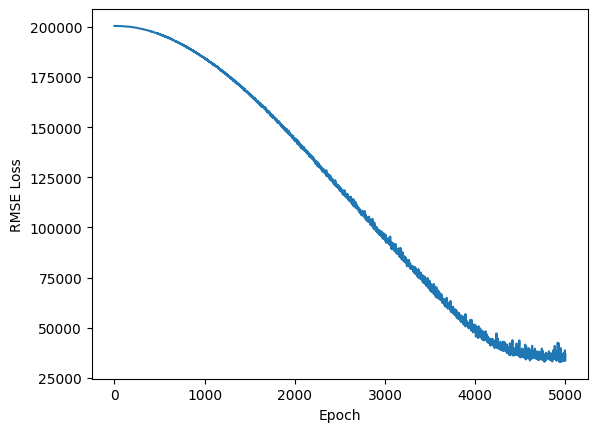

In [50]:
fi_los = [fl.item() for fl in final_losses ]
plt.plot(range(epochs), fi_los)
plt.ylabel('RMSE Loss')
plt.xlabel('Epoch');

In [51]:
#https://github.com/pytorch/pytorch/issues/44023
#Modify the source code directly
#path : C:\Users\Tanlocal\anaconda3\envs\torch1\Lib\site-packages\torch\_tensor.py:line 1062
#On line 1062, replace self.numpy() with self.detach().numpy() 
# Line 1064 : replace self.numpy().astype(dtype, copy=False) with self.detach().numpy().astype(dtype, copy=False)
#Restart kernel and run all

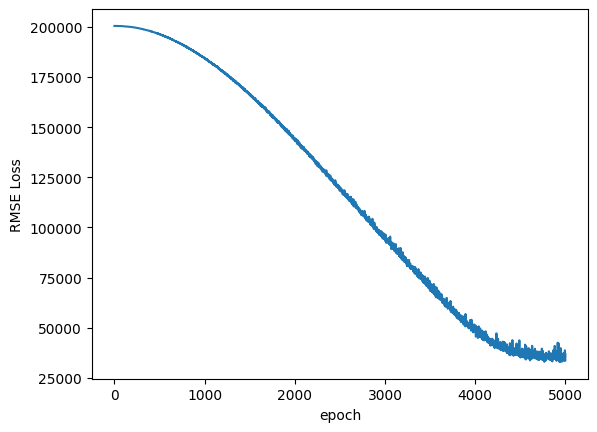

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [53]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 38095.33984375


In [54]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [55]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [56]:
data_predicted

,Prediction
0,123252.546875
1,184628.890625
2,124787.906250
3,221801.984375
4,196603.796875
5,204319.796875
6,161126.171875
7,285357.125000
8,158928.609375
9,365927.250000


In [57]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,123252.546875,6747.453125
1,138887.0,184628.890625,-45741.890625
2,175500.0,124787.906250,50712.093750
3,195000.0,221801.984375,-26801.984375
4,142500.0,196603.796875,-54103.796875


In [58]:
#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')

In [59]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [60]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [61]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [62]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)